
# CSE 6264 Data and Visual Analytics

In [0]:
# Standard libraries
import os, sys
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
'''
                   _:=:_
            .-""""`_'='_`""""-.
           (`,-- -`\   /`- --,`)
           / //`-_--| |--_-`\\ \
          / /(_-_  _| |_  _-_)\ \
         / / (_- __ \ / __ -_) \ \
        / /  (_ -_ - ^ - _- _)  \ \
       / /   (_-  _ /=\ _ - _)   \ \
      / /     (_ -.':=:'. -_)     \ \
     (`;`     (_-'  :=:  '-_)     `;`)
      \\.   jgs __  :=:  __       .//
       \\\    .'  `':=:'`  '.    ///

                 ,---.  ,--. 
                /  O  \ |  | 
               |  .-.  ||  | 
               |  | |  ||  | 
               `--' `--'`--' 
                                            
 ,-----.,--.  ,--.,------. ,-----.,--. ,--. 
'  .--./|  '--'  ||  .---''  .--./|  .'   / 
|  |    |  .--.  ||  `--, |  |    |  .   '  
'  '--'\|  |  |  ||  `---.'  '--'\|  |\   \ 
 `-----'`--'  `--'`------' `-----'`--' '--' 

A computer aided diagnosis (CAD) system for chest x-rays.

Khandaker Ahmed
Venkata Krishna Parupalli Naga Sanjeeva
Xinlu Tu
Hammad Usmani
Sol Won

Main References:
- https://www.kaggle.com/kmader/train-simple-xray-cnn
- http://openaccess.thecvf.com/content_cvpr_2017/papers/Wang_ChestX-ray8_Hospital-Scale_Chest_CVPR_2017_paper.pdf
'''
# Please feel free to edit, here's some hello world code you can execute. Just click play!
print('hello world')

hello world


In [0]:
'''
In this cell, we download the full dataset from the NIH DropBox. Please visit 
https://nihcc.app.box.com/v/ChestXray-NIHCC/file/371647823217t for more info.

This should take around ~30 minutes to download. Note that your internet speeds
won't affect the rate of download since the colab notebook is on Google's
server instead of locally.

Run the following lines to download just the sample,
!gdown https://drive.google.com/uc?id=1Os-RjXx0Yebc3aIEqeZc1JjHOLZ_ZFCi
!mkdir data
!unzip -q sample.zip -d data/
'''
import urllib
links = [
  'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
  'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
  'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
  'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
  'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
	'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
	'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

def reporthook(blocknum, blocksize, totalsize):
    readsofar = blocknum * blocksize
    if totalsize > 0:
        percent = readsofar * 1e2 / totalsize
        s = "\r%5.1f%% %*d / %d" % (
            percent, len(str(totalsize)), readsofar, totalsize)
        print(s, end = '')
        if readsofar >= totalsize: # near the end
            print("\n")
    else: # total size is unknown
        print("read %d\n" % (readsofar), end = '')

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading', fn, '...')
    urllib.request.urlretrieve(link, fn, reporthook)  # download the zip file
print("Download complete. Please check the checksums")

downloading images_01.tar.gz ...
100.0% 2008473600 / 2008470987

downloading images_02.tar.gz ...
100.0% 3952623616 / 3952623504

downloading images_03.tar.gz ...
100.0% 3929235456 / 3929234850

downloading images_04.tar.gz ...
100.0% 3838910464 / 3838903983

downloading images_05.tar.gz ...
100.0% 3935502336 / 3935496531

downloading images_06.tar.gz ...
100.0% 3986309120 / 3986301172

downloading images_07.tar.gz ...
100.0% 4016332800 / 4016328426

downloading images_08.tar.gz ...
100.0% 4018348032 / 4018347353

downloading images_09.tar.gz ...
100.0% 4111335424 / 4111327929

downloading images_10.tar.gz ...
100.0% 4181557248 / 4181556296

downloading images_11.tar.gz ...
100.0% 4187086848 / 4187084020

downloading images_12.tar.gz ...
100.0% 2914189312 / 2914187733

Download complete. Please check the checksums


In [0]:
# we now decompress the data. This might take a while (~5 mins)
!mkdir data
!for file in *.tar.gz; do tar -zxf "$file" -C data --checkpoint=.10000; done

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [0]:
# we download the x ray labels and associated metadata
!wget https://gist.githubusercontent.com/hammad93/b362e115613c1057fe0bf320e8a20a89/raw/333a9755311d2ffbec3fa70fd49a511136885b51/Data_Entry_2017.csv

--2019-11-19 21:47:37--  https://gist.githubusercontent.com/hammad93/b362e115613c1057fe0bf320e8a20a89/raw/333a9755311d2ffbec3fa70fd49a511136885b51/Data_Entry_2017.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7749031 (7.4M) [text/plain]
Saving to: ‘Data_Entry_2017.csv’

Data_Entry_2017.csv 100%[===================>]   7.39M  --.-KB/s    in 0.08s   

2019-11-19 21:47:38 (97.7 MB/s) - ‘Data_Entry_2017.csv’ saved [7749031/7749031]



In [0]:
'''
To facilitate reading the x-ray's, we create a dictionary to absolute file paths
accessible by the index of the x-ray. The index is used in the classifications
of each, e.g.
{
  '00000001_000.png' : Absolute File Path,
  '00000002_000.png' : ...
  ...
}
'''
xrays = {}
xrays_base_directory = os.getcwd() + '/data/images/'
xrays_list = os.listdir(xrays_base_directory)
for xray in xrays_list :
  xrays[xray] = xrays_base_directory + xray
# add classifications directory to x-ray dictionary
xrays['classifications'] = os.getcwd() + '/Data_Entry_2017.csv'

In [0]:
def get_image(index) :
  '''
  Using the Google storage client linked to the NIH Chest X Ray dataset, we
  return the binary string representation of the input image index

  Parameters
  ----------
  index : String
    The image index name as defined in the classifications DataFrame and other
    databases that reference this dataset. e.g. '00000001_000.png'

  Returns
  -------
  binary string
    The binary string representation of the image pulled from the client
  '''
  with open(xrays[index], mode='rb') as file: # b is important -> binary
    result = file.read()
  return result
def get_classification(index) :
  '''
  With the classifications dataframe, we return the dictionary with all the
  classifications of the particular index

  Parameters
  ----------
  index : String
    The image index name as defined in the classifications DataFrame and other
    databases that reference this dataset. e.g. '00000001_000.png'

  Returns
  -------
  dict
    Dictionary with keys like 'Finding Labels' and 'Patient Age' that describes
    the image index
  '''
  # Get results
  result = classifications.loc[classifications['Image Index'] == index].to_dict()
  # Reshape and clean results. We return index 0 because there are no duplicates 
  for key in result.keys() :
    result[key] = result[key][list(result[key].keys())[0]]
  return result

{'Finding Labels': 'Effusion',
 'Follow-up #': 0,
 'Height]': 2449,
 'Image Index': '00000011_000.png',
 'OriginalImagePixelSpacing[x': 0.14300000000000002,
 'OriginalImage[Width': 2638,
 'Patient Age': 75,
 'Patient Gender': 'M',
 'Patient ID': 11,
 'Unnamed: 11': nan,
 'View Position': 'PA',
 'y]': 0.14300000000000002}

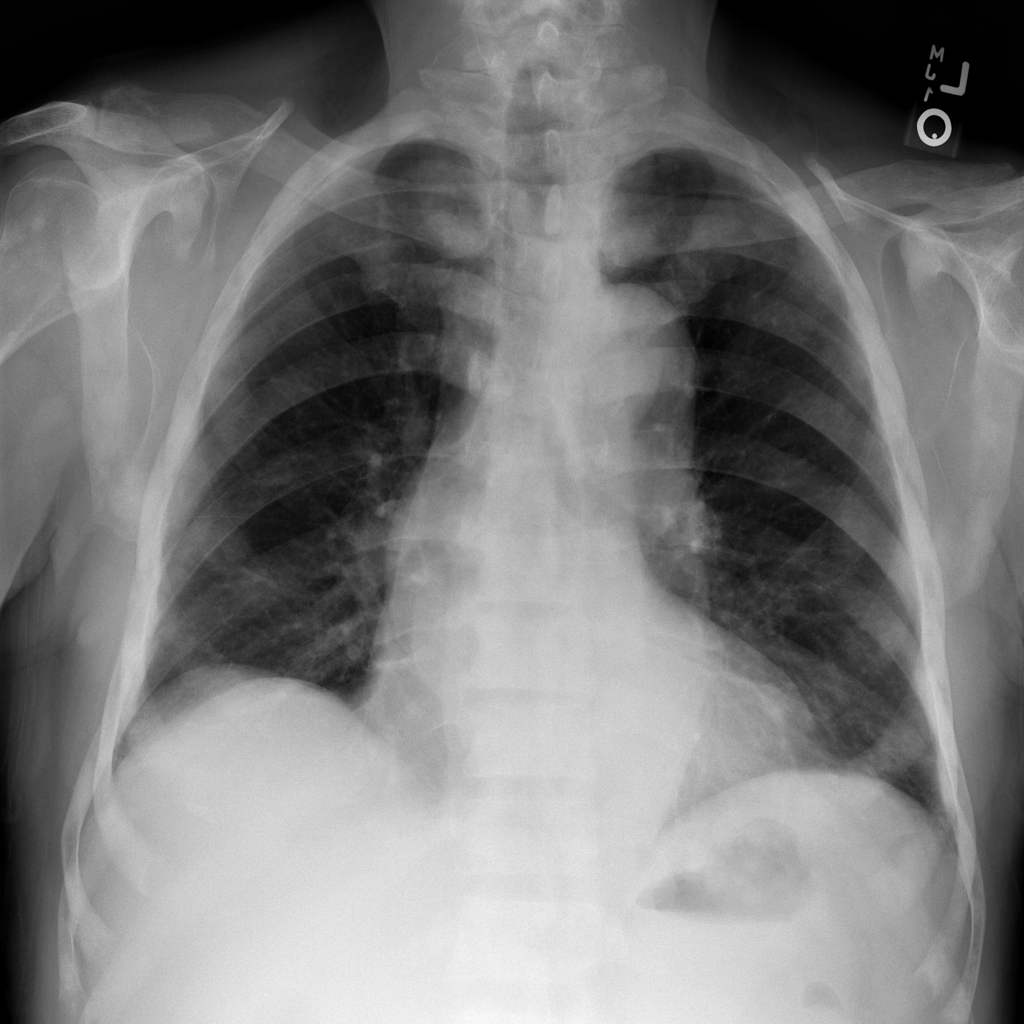

In [0]:
'''
Here, we test an example from the dataset and list some properties of the chest
x ray. We found the classifications from the file 'Data_Entry_2017.csv' here,
https://nihcc.app.box.com/v/ChestXray-NIHCC
'''
from IPython.display import Image
from IPython.display import display

# Load classifications into a DataFrame
classifications = pd.read_csv(xrays['classifications'])
# Show data from example x-ray
test_index = 28
test = classifications.loc[test_index]['Image Index']
display(get_classification(test))
Image(get_image(test), width=400, height=400)

In [0]:
'''
We further analyze the dataset with the help of this Kaggle kernel,
https://www.kaggle.com/kmader/train-simple-xray-cnn
'''
print('Scans found:', len(xrays), ', Total Headers', classifications.shape[0])
classifications.sample(10)

Scans found: 112121 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
33795,00008855_011.png,No Finding,11,8855,21,M,AP,2500,2048,0.168,0.168,NaN
3272,00000869_005.png,No Finding,5,869,76,F,PA,2992,2991,0.143,0.143,NaN
10832,00002813_000.png,No Finding,0,2813,58,F,PA,2048,2500,0.171,0.171,NaN
13777,00003547_003.png,Nodule,3,3547,43,M,AP,2500,2048,0.171,0.171,NaN
66360,00016410_031.png,Emphysema,31,16410,42,F,AP,2500,2048,0.168,0.168,NaN
50744,00012834_149.png,No Finding,149,12834,34,M,AP,2500,2048,0.168,0.168,NaN
96685,00025476_011.png,Atelectasis,11,25476,36,M,AP,3056,2544,0.139,0.139,NaN
17264,00004627_001.png,No Finding,1,4627,61,M,PA,2048,2500,0.171,0.171,NaN
15645,00004109_001.png,No Finding,1,4109,55,F,PA,2048,2500,0.168,0.168,NaN
96698,00025482_001.png,No Finding,1,25482,49,F,AP,3056,2544,0.139,0.139,NaN


In [0]:
'''
In order to create a classifier for a CAD, we need to first find the labels.
We find the unique labels and then 'one hot encode' them. For more information
on what one hot encoding is, reference this guide,
https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
'''
# Get unique labels
labels = np.unique(np.hstack([label.split('|') for label in classifications['Finding Labels']]))
# Remove No Finding. Also remove Hernia because of lack of data
labels = [label for label in labels if label not in ['Hernia', 'No Finding']]
print('Labels ({}): {}'.format(len(labels), labels))
# One hot encoding
for label in labels:
  classifications[label] = classifications['Finding Labels'].map(lambda finding: 1.0 if label in finding else 0)

# Create a new DataFrame with our encoding
encoding = pd.DataFrame(list(zip(classifications['Image Index'].values,
                                 xrays_base_directory + classifications['Image Index'].values,
                                 classifications[labels].values,
                                 [label.split('|') for label in classifications['Finding Labels']])),
                        columns = ['Image Index', 'Path', 'Encoding', 'Labels'])
# Remove No Finding. Also remove Hernia because of lack of data
encoding['Labels'] = encoding['Labels'].map(lambda x : [label for label in x if label not in ['Hernia', 'No Finding']])
encoding = encoding[encoding['Labels'].apply(lambda x : len(x)) > 0] # Remove rows with no labels

Labels (13): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [0]:
classifications.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
encoding.head()

,Image Index,Path,Encoding,Labels
0,00000001_000.png,/content/data/images/00000001_000.png,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[Cardiomegaly]
1,00000001_001.png,/content/data/images/00000001_001.png,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[Cardiomegaly, Emphysema]"
2,00000001_002.png,/content/data/images/00000001_002.png,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[Cardiomegaly, Effusion]"
7,00000003_003.png,/content/data/images/00000003_003.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",[Infiltration]
12,00000004_000.png,/content/data/images/00000004_000.png,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[Mass, Nodule]"


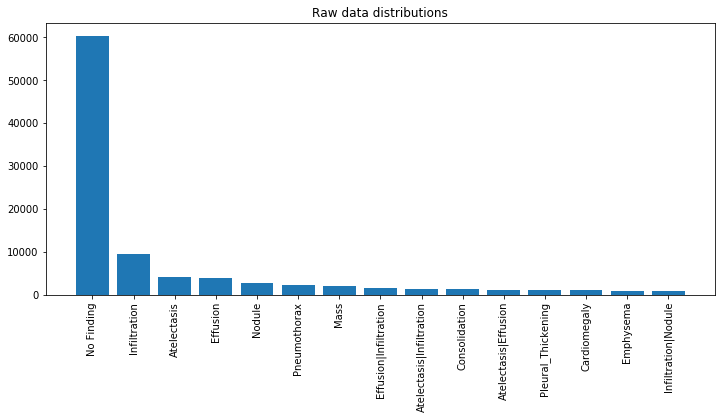

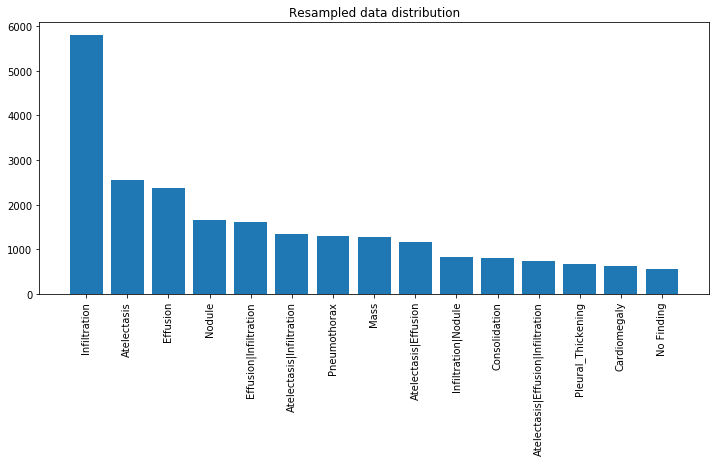

In [0]:
'''
We now resample the data such that the training will be conductive. As we see
below in the raw data, most of the x-ray's have 'No Finding' and thus a
classifier can simply label all x-rays with 'No Finding' and be right. We use
sample weights to resample the dataset.

We set the sample weights with these general rules,
- Significantly reduce the ratio of 'No Finding' classifications
- Significantly increase the ratio of multiple classification as it is an 
  under represented group

Note how infiltration becomes the biggest label.
'''
sample_size = 40000

# Graph the raw data distributions
label_counts = classifications['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1, 1, figsize = (12, 5))
ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 0.5)
ax1.set_title('Raw data distributions')
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

# Resample the data according to the general rules outlined above
multiple_class_factor = 100 # The power factor of how much we should increase the ratio of multiple classifications
no_finding_factor = 0.01 # Should be greater than 0 but less than 1
sample_weights = classifications['Finding Labels'].map(
    lambda x: len(x.split('|')) ** multiple_class_factor
      if x != 'No Finding' else no_finding_factor
    ).values
sample_weights /= sample_weights.sum()
classifications_sample = classifications.sample(sample_size, weights = sample_weights)

# Graph the resampled data distribution
label_counts = classifications_sample['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1, 1, figsize = (12, 5))
ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 0.5)
ax1.set_title('Resampled data distribution')
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

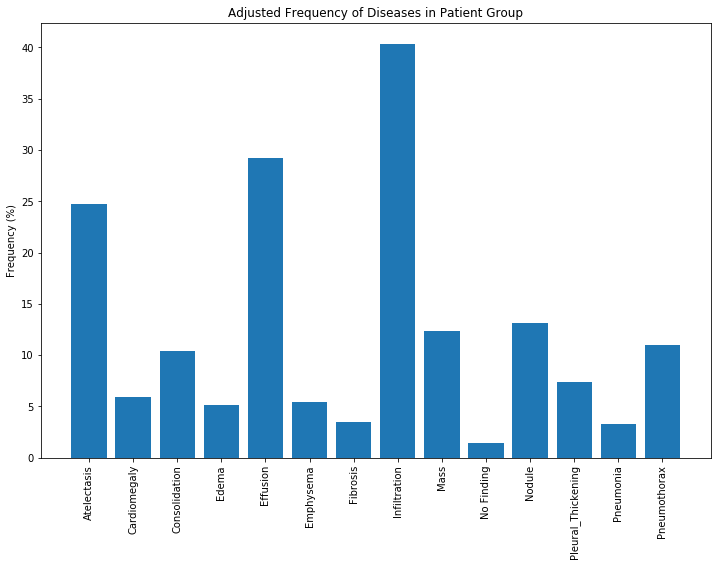

In [0]:
# Graph the adjusted frequency % of each finding
label_counts = 100 * np.mean(classifications_sample[labels].values,0)
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 0.5)
ax1.set_xticklabels(labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')

In [0]:
'''
Split our data into train and test
'''
from sklearn.model_selection import train_test_split
train, test = train_test_split(
    encoding[encoding['Image Index'].isin(classifications_sample['Image Index'])],
    test_size = 0.25, random_state = 2018)
print('Train:', train.shape[0], 'Test:', test.shape[0])

Train: 30000 Test: 10000


In [0]:
'''
Create our data generators to augment our data. Please note that because this
is a random sample, the dataset might not have been large enough for the dataset
to capture all labels in the test dataset. Ensure that there are 15 labels.

- https://keras.io/preprocessing/image/
'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator
xray_resample = (128, 128)
base_dg = ImageDataGenerator(samplewise_center = True, 
                              samplewise_std_normalization = True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range = 0.05, 
                              width_shift_range = 0.1, 
                              rotation_range = 5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range = 0.15)
# training data generator
train_gen = base_dg.flow_from_dataframe(dataframe = train,
                                        x_col = 'Path',
                                        y_col = 'Labels',
                                        target_size = xray_resample,
                                        color_mode = 'grayscale')
test_gen = base_dg.flow_from_dataframe(dataframe = test,
                                        x_col = 'Path',
                                        y_col = 'Labels',
                                        target_size = xray_resample,
                                        color_mode = 'grayscale',
                                        batch_size = 256)
test_X, test_Y = next(base_dg.flow_from_dataframe(dataframe = test,
                                        x_col = 'Path',
                                        y_col = 'Labels',
                                        target_size = xray_resample,
                                        color_mode = 'grayscale',
                                        batch_size = 1024))

TypeError: ignored

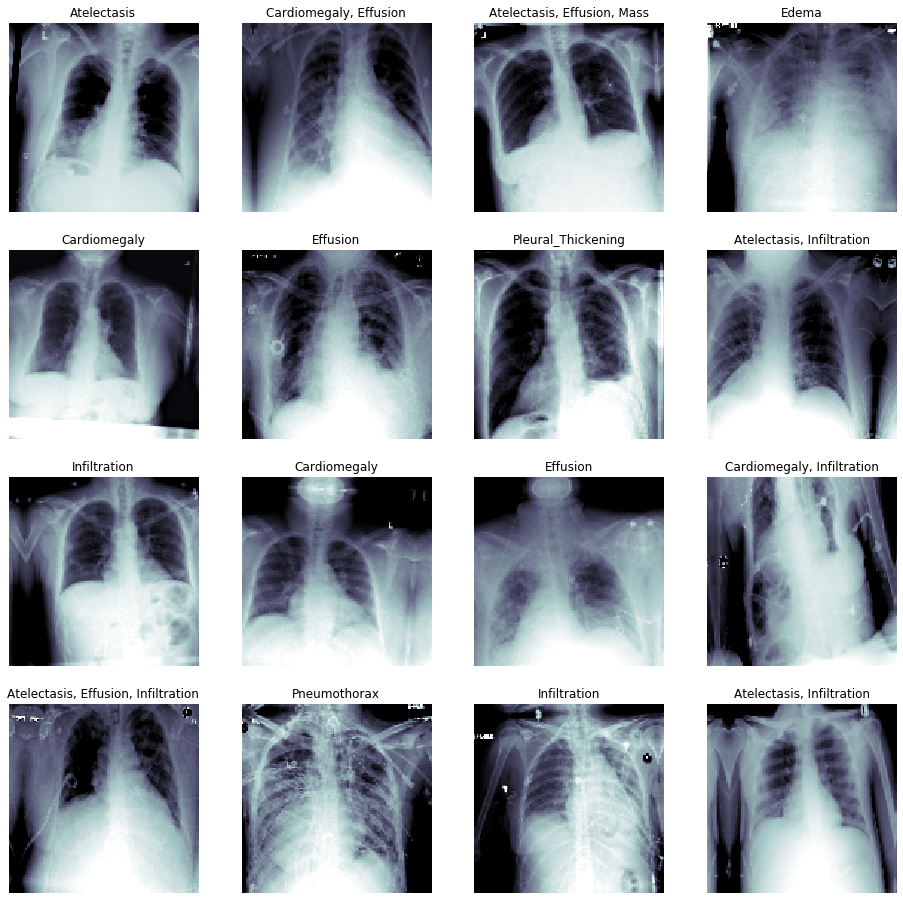

In [0]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
base_mobilenet_model = MobileNet(input_shape =  t_x.shape[1:], 
                                 include_top = False, weights = None)
multi_disease_model = Sequential()
multi_disease_model.add(base_mobilenet_model)
multi_disease_model.add(GlobalAveragePooling2D())
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(512))
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(len(labels), activation = 'sigmoid'))
multi_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])
multi_disease_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228288   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1024)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 15)                7695      
Total params: 3,760,783
Trainable params: 3,738,895
Non-trainable params: 21,888
_______________________________________

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('xray_class')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)
callbacks_list = [checkpoint, early]

In [0]:
multi_disease_model.fit_generator(train_gen, 
                                  steps_per_epoch = 100,
                                  validation_data =  (test_X, test_Y), 
                                  epochs = 5, 
                                  callbacks = callbacks_list)

Epoch 1/5
1024/100 [===================================================================================================================================================================================================================================================================================================================] - 3s 3ms/sample - loss: 0.3338 - binary_accuracy: 0.8747 - mean_absolute_error: 0.2281

Epoch 00001: val_loss improved from inf to 0.32713, saving model to xray_class_weights.best.hdf5
100/100 [==============================] - 61s 608ms/step - loss: 0.4174 - binary_accuracy: 0.8582 - mean_absolute_error: 0.1872 - val_loss: 0.3271 - val_binary_accuracy: 0.8747 - val_mean_absolute_error: 0.2281
Epoch 2/5
1024/100 [==============================================================================================================================================================================================================================================================

In [0]:
# load the best weights
multi_disease_model.load_weights(weight_path)

In [0]:
pred_Y = multi_disease_model.predict(test_X, batch_size = 32, verbose = True)

1024/1024 [==============================] - 1s 1ms/sample


In [0]:
# look at how often the algorithm predicts certain diagnoses 
for c_label, p_count, t_count in zip(labels, 
                                     100*np.mean(pred_Y,0), 
                                     100*np.mean(test_Y,0)):
    print('%s: Dx: %2.2f%%, PDx: %2.2f%%' % (c_label, t_count, p_count))

Atelectasis: Dx: 24.12%, PDx: 29.38%
Cardiomegaly: Dx: 6.35%, PDx: 9.07%
Consolidation: Dx: 8.59%, PDx: 19.35%
Edema: Dx: 5.27%, PDx: 10.00%
Effusion: Dx: 26.76%, PDx: 38.76%
Emphysema: Dx: 5.08%, PDx: 15.94%
Fibrosis: Dx: 4.49%, PDx: 7.11%
Hernia: Dx: 0.29%, PDx: 2.32%
Infiltration: Dx: 40.33%, PDx: 54.85%
Mass: Dx: 11.91%, PDx: 18.15%
No Finding: Dx: 1.46%, PDx: 5.21%
Nodule: Dx: 11.43%, PDx: 25.21%
Pleural_Thickening: Dx: 6.25%, PDx: 9.48%
Pneumonia: Dx: 3.03%, PDx: 13.05%
Pneumothorax: Dx: 13.28%, PDx: 20.15%


1 image: ['Atel:29%', 'Card: 9%', 'Cons:19%', 'Edem:10%', 'Effu:39%', 'Emph:16%', 'Fibr: 7%', 'Hern: 2%', 'Infi:55%', 'Mass:18%', 'No F: 5%', 'Nodu:25%', 'Pleu: 9%', 'Pneu:13%', 'Pneu:20%']
2 image: ['Atel:29%', 'Card: 9%', 'Cons:19%', 'Edem:10%', 'Effu:39%', 'Emph:16%', 'Fibr: 7%', 'Hern: 2%', 'Infi:55%', 'Mass:18%', 'No F: 5%', 'Nodu:25%', 'Pleu: 9%', 'Pneu:13%', 'Pneu:20%']
3 image: ['Atel:29%', 'Card: 9%', 'Cons:19%', 'Edem:10%', 'Effu:39%', 'Emph:16%', 'Fibr: 7%', 'Hern: 2%', 'Infi:55%', 'Mass:18%', 'No F: 5%', 'Nodu:25%', 'Pleu: 9%', 'Pneu:13%', 'Pneu:20%']
4 image: ['Atel:29%', 'Card: 9%', 'Cons:19%', 'Edem:10%', 'Effu:39%', 'Emph:16%', 'Fibr: 7%', 'Hern: 2%', 'Infi:55%', 'Mass:18%', 'No F: 5%', 'Nodu:25%', 'Pleu: 9%', 'Pneu:13%', 'Pneu:20%']
5 image: ['Atel:29%', 'Card: 9%', 'Cons:19%', 'Edem:10%', 'Effu:39%', 'Emph:16%', 'Fibr: 7%', 'Hern: 2%', 'Infi:55%', 'Mass:18%', 'No F: 5%', 'Nodu:25%', 'Pleu: 9%', 'Pneu:13%', 'Pneu:20%']
6 image: ['Atel:29%', 'Card: 9%', 'Cons:19%', 'Ede

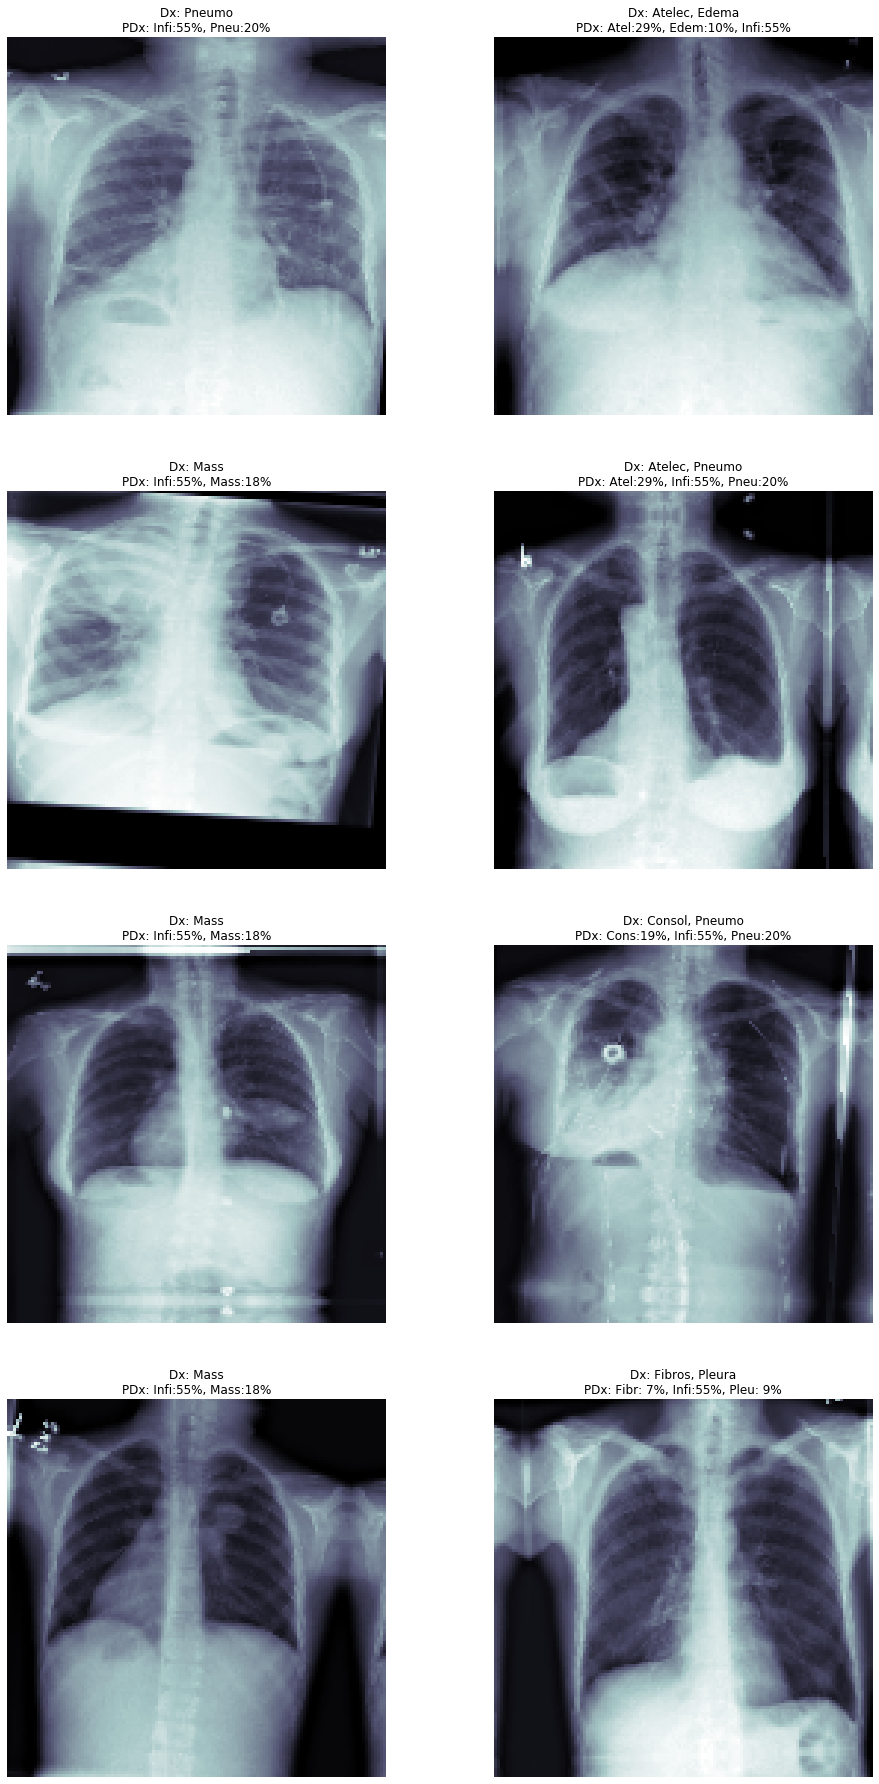

In [0]:
sickest_idx = np.argsort(np.sum(test_Y, 1)<1)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
count = 0
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(labels, test_Y[idx]) if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)
      for n_class, n_score, p_score in zip(labels, test_Y[idx], pred_Y[idx])]
      # (n_score>0.5) or (p_score>0.5)
    print('{} image: {}'.format(count +1, pred_str))
    pred_str_formatted = ['%s:%2.0f%%' % (n_class[:4], p_score*100)
      for n_class, n_score, p_score in zip(labels, test_Y[idx], pred_Y[idx])
      if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str_formatted))
    c_ax.axis('off')
    count += 1

In [0]:
# save the model. please note that we add /1 for the version number that's required for serving it
multi_disease_model.save('xrayai/1', save_format = 'tf')

INFO:tensorflow:Assets written to: xrayai/1/assets
INFO:tensorflow:Assets written to: xrayai/1/assets


In [0]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update


deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  13625      0 --:--:-- --:--:-- --:--:-- 13562
OK
deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  13625      0 --:--:-- --:--:-- --:--:-- 13562
OK
Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRel

In [0]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 78 not upgraded.
Need to get 140 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.0.0 [140 MB]
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 78 not upgraded.
Need to get 140 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.0.0 [140 MB]
Fetched 140 MB in 7s (21.4 MB/s)
Fetched 140 MB in 7s (21.4 MB/s

In [0]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=xrayai \
  --model_base_path=/content/xrayai >server.log 2>&1

In [0]:
!tail server.log

2019-11-15 05:07:51.269963: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-11-15 05:07:51.351423: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:202] Restoring SavedModel bundle.
2019-11-15 05:07:51.746307: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:151] Running initialization op on SavedModel bundle at path: /content/xrayai/1
2019-11-15 05:07:51.882578: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:311] SavedModel load for tags { serve }; Status: success. Took 679665 microseconds.
2019-11-15 05:07:51.897704: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /content/xrayai/1/assets.extra/tf_serving_warmup_requests
2019-11-15 05:07:51.897863: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: xrayai version: 1}
2019-11-15 0

In [0]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": test_X[0:3].tolist()})

'''
{
  "signature_name": "serving_default",
  "instances" : [
    [X Ray 1],
    [X Ray 2],
        :
    [X Ray n]
  ]
}
[X Ray n] => [n_1, n_2, n_3, ... n_i]
'''


In [0]:
!pip install -q requests

import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/xrayai:predict', data=data, headers=headers)
print(json_response.text)

'''
{
  "predictions" : [[xray_1_probability_disease_1,
                    xray_1_probability_disease_2,
                    :
                    xray_1_probability_disease_n]]
}
'''

{
    "predictions": [[0.000504995114, 0.000944492174, 0.0148276426, 0.000447838, 0.556742907, 4.17552526e-09, 4.7073873e-15, 0.0, 0.40279755, 0.00225895294, 1.20501263e-05, 0.0214375816, 9.39037727e-06, 5.23738936e-06, 1.12717853e-05], [0.000504995114, 0.000944492174, 0.0148276426, 0.000447838, 0.556742907, 4.17552526e-09, 4.7073873e-15, 0.0, 0.40279755, 0.00225895294, 1.20501263e-05, 0.0214375816, 9.39095116e-06, 5.23738936e-06, 1.12717853e-05], [0.000504982774, 0.000944469, 0.0148272794, 0.000447827, 0.556729257, 4.17542267e-09, 4.70727168e-15, 0.0, 0.402812272, 0.00225889753, 1.20498307e-05, 0.0214370564, 9.39072106e-06, 5.23726112e-06, 1.12715088e-05]
    ]
}
{
    "predictions": [[0.000504995114, 0.000944492174, 0.0148276426, 0.000447838, 0.556742907, 4.17552526e-09, 4.7073873e-15, 0.0, 0.40279755, 0.00225895294, 1.20501263e-05, 0.0214375816, 9.39037727e-06, 5.23738936e-06, 1.12717853e-05], [0.000504995114, 0.000944492174, 0.0148276426, 0.000447838, 0.556742907, 4.17552526e-09, 4

In [0]:
predictions = json.loads(json_response.text)['predictions']

In [0]:
predictions

[[0.000504995114,
  0.000944492174,
  0.0148276426,
  0.000447838,
  0.556742907,
  4.17552526e-09,
  4.7073873e-15,
  0.0,
  0.40279755,
  0.00225895294,
  1.20501263e-05,
  0.0214375816,
  9.39037727e-06,
  5.23738936e-06,
  1.12717853e-05],
 [0.000504995114,
  0.000944492174,
  0.0148276426,
  0.000447838,
  0.556742907,
  4.17552526e-09,
  4.7073873e-15,
  0.0,
  0.40279755,
  0.00225895294,
  1.20501263e-05,
  0.0214375816,
  9.39095116e-06,
  5.23738936e-06,
  1.12717853e-05],
 [0.000504982774,
  0.000944469,
  0.0148272794,
  0.000447827,
  0.556729257,
  4.17542267e-09,
  4.70727168e-15,
  0.0,
  0.402812272,
  0.00225889753,
  1.20498307e-05,
  0.0214370564,
  9.39072106e-06,
  5.23726112e-06,
  1.12715088e-05]]

[[0.000504995114,
  0.000944492174,
  0.0148276426,
  0.000447838,
  0.556742907,
  4.17552526e-09,
  4.7073873e-15,
  0.0,
  0.40279755,
  0.00225895294,
  1.20501263e-05,
  0.0214375816,
  9.39037727e-06,
  5.23738936e-06,
  1.12717853e-05],
 [0.000504995114,
  0.000944492174,
  0.0148276426,
  0.000447838,
  0.556742907,
  4.17552526e-09,
  4.7073873e-15,
  0.0,
  0.40279755,
  0.00225895294,
  1.20501263e-05,
  0.0214375816,
  9.39095116e-06,
  5.23738936e-06,
  1.12717853e-05],
 [0.000504982774,
  0.000944469,
  0.0148272794,
  0.000447827,
  0.556729257,
  4.17542267e-09,
  4.70727168e-15,
  0.0,
  0.402812272,
  0.00225889753,
  1.20498307e-05,
  0.0214370564,
  9.39072106e-06,
  5.23726112e-06,
  1.12715088e-05]]